# Automatic Fs low values reduction calculator
This script automatically calculates the config parameter `min_value_for_not_reduce` for Fs small values reduction (for noisy Fs). It was written both for research (prior to writing production code) and for POCs (running versions of the product without automatic Fs low values reduction calculation in the production code).

### Assumptions:
This script assumes that there's an accessible mongo with the collections starting with `scored___aggr_event` populated. These are used in order to find which Fs are noisy (such that low values reduction can help reducing the noise).

### Configuration:
* `mongo_ip` should be configured with the right ip.
* `verbose` can be set to `True` in order to print more stuff.
* `show_graphs` should be set to `True` only when you want to display graphs (typically in research environment).
* `aggregated_feature_event_prevalance_stats_path` is the path to the version of the configuration installed for the customer. The reason this is needed is so we can undo the reduction done in runtime - so we can see the real values and scores and decide on the right new reduction (which might be different than what we've set during the installation process).

### Output:
The names of the Fs that should be reduced are printed following by a number - this is the `min_value_for_not_reduce` parameter. All the other parameters (`max_value_for_fully_reduce` and `reducing_factor`) should be set manually.

In [ ]:
import time
import datetime
import sys
sys.path.append('..')
from utils import print_verbose
from algorithm.fs_reduction import calc_min_value_for_not_reduce_for_hists
import config
if config.show_graphs:
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%%javascript
//IPython.load_extensions('usability\\execute_time\\ExecuteTime');

In [ ]:
start_time = time.time()


----------------------------------------------------------------------
--------------------- min_value_for_not_reduce  ----------------------
----------------------------------------------------------------------

17:57:50: scored___aggr_event__distinct_number_of_dst_machines_kerberos_logins_hourly:
17:57:50: true positives:
17:57:50: Area under histogram: 3556.8228
17:57:50: {4.0: 13.683200000000005, 5.0: 389.77799999999957, 6.0: 737.6283999999981, 7.0: 702.795599999999, 8.0: 622.4907999999999, 9.0: 407.25519999999966, 10.0: 206.81759999999994, 11.0: 136.16840000000002, 12.0: 78.24839999999998, 13.0: 47.92560000000001, 14.0: 30.100800000000003, 15.0: 17.558799999999998, 16.0: 16.8952, 17.0: 18.036, 18.0: 9.2792, 19.0: 11.0692, 20.0: 8.296, 21.0: 8.032, 22.0: 5.7788, 23.0: 4.3752, 24.0: 2.894, 25.0: 3.0, 26.0: 7.759600000000001, 27.0: 3.8384, 28.0: 4.7468, 29.0: 1.7884, 30.0: 2.9996, 31.0: 1.5904, 32.0: 2.6888, 33.0: 2.9996, 34.0: 0.84, 35.0: 2.768, 36.0: 1.0, 37.0: 1.4524, 38.0: 4.66

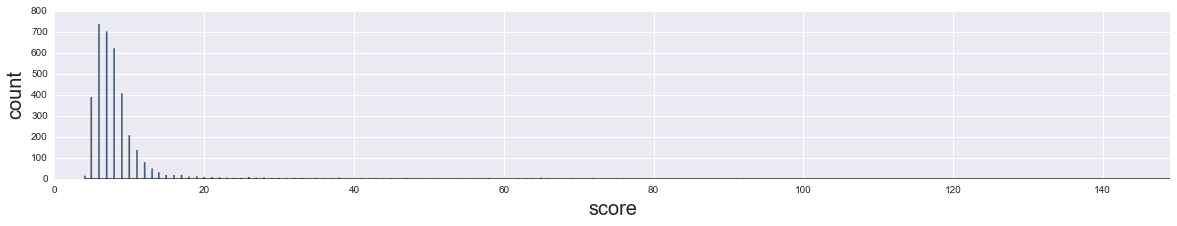

17:57:50: false positives:
17:57:50: Area under histogram: 4.132
17:57:50: {8.0: 3.5984000000000003, 4.0: 0.5335999999999999}


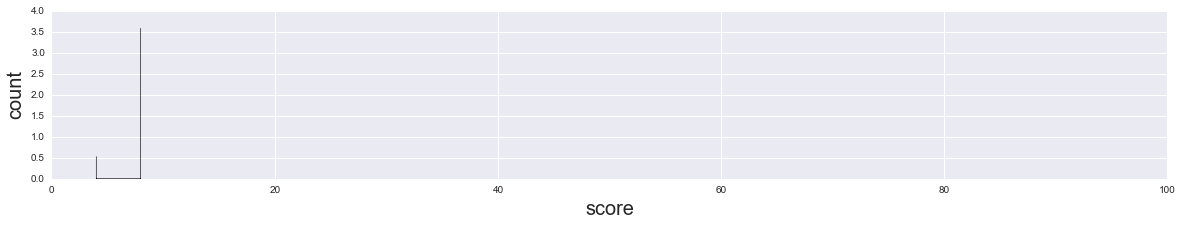

17:57:50: true preserved: {0: 3556.8227999999967, 5.0: 3543.139599999997, 6.0: 3153.3615999999975, 7.0: 2415.733199999999, 8.0: 1712.937599999999, 9.0: 1090.4467999999993, 10.0: 683.1916000000001, 11.0: 476.37399999999997, 12.0: 340.2055999999999, 13.0: 261.9572, 14.0: 214.03159999999994, 15.0: 183.9308, 16.0: 166.37200000000004, 17.0: 149.4768, 18.0: 131.4408, 19.0: 122.1616, 20.0: 111.0924, 21.0: 102.7964, 22.0: 94.76440000000001, 23.0: 88.98560000000002, 24.0: 84.6104, 25.0: 81.71639999999998, 26.0: 78.7164, 27.0: 70.95679999999999, 28.0: 67.1184, 29.0: 62.3716, 30.0: 60.5832, 31.0: 57.5836, 32.0: 55.9932, 33.0: 53.30440000000001, 34.0: 50.30480000000001, 35.0: 49.46480000000001, 36.0: 46.69680000000002, 37.0: 45.69680000000002, 38.0: 44.24440000000001, 39.0: 39.58120000000001, 40.0: 38.128800000000005, 41.0: 37.128800000000005, 42.0: 35.128800000000005, 43.0: 33.6472, 44.0: 32.6472, 45.0: 31.647199999999998, 46.0: 30.0172, 48.0: 27.1808, 49.0: 26.1808, 50.0: 25.1808, 52.0: 24.2592,

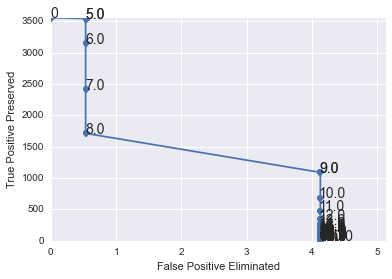


17:57:54: scored___aggr_event__distinct_number_of_dst_machines_ssh_daily:
17:57:54: true positives:
17:57:54: Area under histogram: 646.5852
17:57:54: {45.0: 0.9216, 4.0: 13.169999999999986, 5.0: 82.21599999999994, 6.0: 91.17640000000003, 7.0: 75.7632, 8.0: 64.52439999999999, 9.0: 48.883599999999994, 10.0: 31.598799999999997, 11.0: 23.978000000000005, 12.0: 28.5048, 13.0: 22.204400000000003, 14.0: 19.3728, 15.0: 6.0096, 16.0: 8.259999999999998, 17.0: 5.571999999999999, 18.0: 10.325199999999999, 19.0: 11.9328, 20.0: 5.8812, 21.0: 4.0, 22.0: 2.3068, 23.0: 2.9452, 24.0: 3.2512000000000003, 25.0: 1.0, 26.0: 1.0, 27.0: 4.3020000000000005, 28.0: 6.1276, 29.0: 4.7744, 30.0: 5.9956000000000005, 31.0: 2.9936, 32.0: 0.75, 161.0: 1.0, 34.0: 2.8648, 35.0: 2.0, 36.0: 3.9387999999999996, 37.0: 2.8064, 678.0: 1.0, 39.0: 0.9856, 40.0: 1.996, 156.0: 1.0, 95.0: 1.0, 43.0: 2.0, 44.0: 0.9996, 173.0: 1.0, 46.0: 1.0, 47.0: 0.9952000000000001, 50.0: 0.9856, 162.0: 1.0, 54.0: 1.0, 137.0: 1.0, 57.0: 0.99, 59.

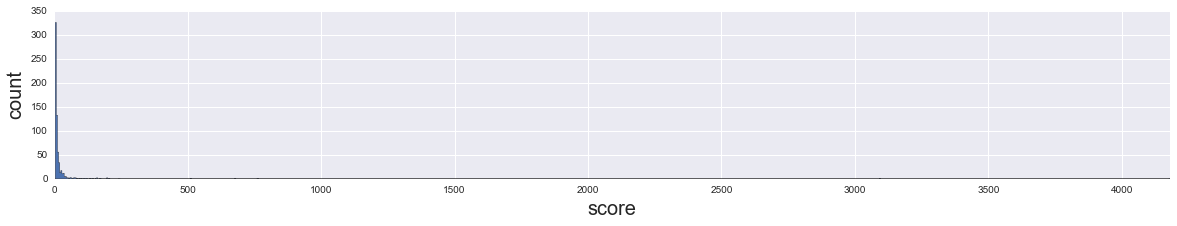

17:57:55: false positives:
17:57:55: Area under histogram: 12.6572
17:57:55: {33.0: 0.6863999999999999, 4.0: 2.7439999999999993, 5.0: 3.6012, 6.0: 1.6256, 7.0: 1.0, 16.0: 1.0, 19.0: 2.0}


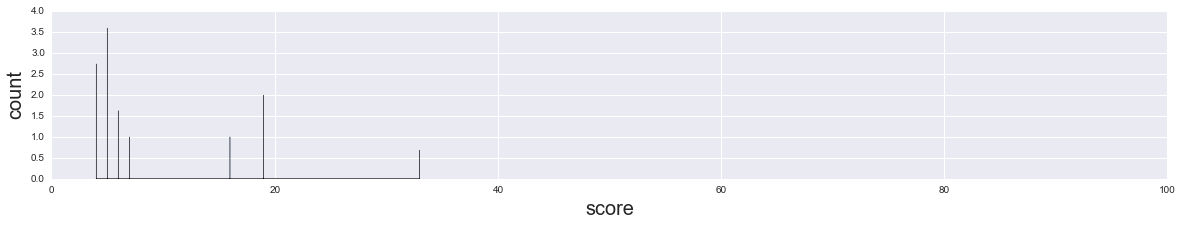

17:57:55: true preserved: {0: 646.5852, 512.0: 3.36, 5.0: 633.4152, 6.0: 551.1991999999999, 7.0: 460.0227999999998, 8.0: 384.25959999999975, 9.0: 319.7351999999999, 10.0: 270.8516, 11.0: 239.25280000000006, 12.0: 215.2748, 13.0: 186.77, 14.0: 164.56560000000002, 15.0: 145.1928, 16.0: 139.18319999999997, 17.0: 130.92319999999995, 18.0: 125.35119999999999, 19.0: 115.026, 20.0: 103.09320000000001, 21.0: 97.212, 22.0: 93.21199999999999, 23.0: 90.9052, 24.0: 87.96, 25.0: 84.7088, 26.0: 83.7088, 27.0: 82.7088, 28.0: 78.4068, 29.0: 72.2792, 30.0: 67.50480000000002, 31.0: 61.50920000000002, 32.0: 58.51560000000001, 33.0: 57.76560000000001, 34.0: 56.76560000000001, 35.0: 53.90080000000002, 36.0: 51.90080000000001, 37.0: 47.962, 38.0: 45.1556, 39.0: 43.8612, 40.0: 42.875600000000006, 41.0: 40.8796, 43.0: 39.88, 44.0: 37.879999999999995, 45.0: 36.8804, 46.0: 35.9588, 47.0: 34.9588, 48.0: 33.9636, 51.0: 32.978, 162.0: 9.719999999999999, 55.0: 31.978, 58.0: 30.988000000000003, 60.0: 29.988, 138.0: 

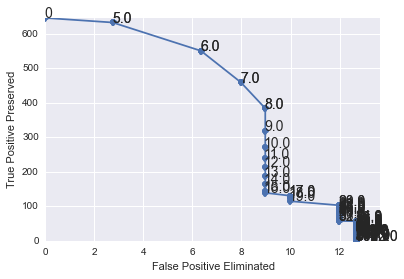


17:57:56: scored___aggr_event__distinct_number_of_dst_machines_kerberos_logins_daily:
17:57:56: true positives:
17:57:56: Area under histogram: 489.5892
17:57:56: {4.0: 0.1180000000000001, 5.0: 3.7012, 6.0: 19.748400000000007, 7.0: 37.93640000000001, 8.0: 33.5148, 9.0: 54.909200000000006, 10.0: 54.662399999999955, 11.0: 37.28240000000001, 12.0: 36.281600000000005, 13.0: 25.596400000000006, 14.0: 31.2172, 15.0: 23.0292, 16.0: 14.794799999999999, 17.0: 12.460400000000002, 18.0: 6.8452, 19.0: 5.374799999999999, 20.0: 6.806, 21.0: 8.1132, 22.0: 9.1416, 23.0: 3.124, 24.0: 5.4356, 25.0: 6.304400000000001, 26.0: 5.569599999999999, 27.0: 2.4055999999999997, 28.0: 6.6256, 29.0: 2.8392, 30.0: 3.2588, 31.0: 1.9596, 32.0: 3.62, 33.0: 1.9504, 34.0: 1.8399999999999999, 35.0: 2.03, 36.0: 1.4956, 37.0: 1.0, 38.0: 0.5548, 40.0: 1.4043999999999999, 41.0: 0.5375999999999999, 44.0: 0.48160000000000003, 45.0: 0.9516, 48.0: 1.3896, 49.0: 0.5375999999999999, 50.0: 0.3599999999999999, 51.0: 0.9984, 55.0: 0.8

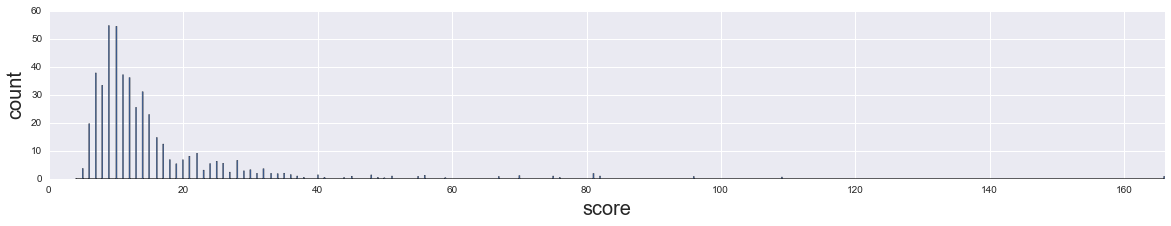

17:57:56: false positives:
17:57:56: Area under histogram: 3.1324
17:57:56: {8.0: 0.84, 11.0: 0.84, 4.0: 0.18999999999999995, 5.0: 0.4224, 6.0: 0.84}


In [ ]:
def create_score_to_weight_squared(min_score):
    def score_to_weight_squared(score):
        return max(0, 1 - ((score - 100) / (100.0 - min_score)) ** 2)
    return score_to_weight_squared

score_to_weight_squared_min_50 = create_score_to_weight_squared(50)
fs = calc_min_value_for_not_reduce_for_hists(score_to_weight_squared_min_50, should_query = False, fs = globals().get('fs', None))